In [1]:
# Python Standard Library
import os
import sys
import glob
import time
import logging
import argparse
import datetime
import warnings
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from copy import deepcopy
import operator
import pyart
import netCDF4
import numpy as np
import pytz
import cartopy
import platform
import scipy

# Custom modules.
import imp
lib_loc = os.path.join(os.path.expanduser('~'), 'projects/CABABORR/cababorr/processing_code.py')

radar_codes = imp.load_source('radar_codes', lib_loc)
%matplotlib inline



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:30:19.067462. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [2]:
my_system = platform.system()

if my_system == 'Darwin':
    top = '/data/sample_sapr_data/sgpstage/sur/'
    s_dir = '/data/interpsonde/'
    odir_r = '/data/egu/radars/'
    odir_s = '/data/egu/stats/'
    odir_i = '/data/egu/images/'
elif my_system == 'Linux':
    top = '/lcrc/group/earthscience/radar/sgpstage/sur/'
    s_dir = '/lcrc/group/earthscience/radar/sgpstage/interp_sonde/'
    odir_r = '/lcrc/group/earthscience/radar/agu2016/radars/'
    odir_s = '/lcrc/group/earthscience/radar/agu2016/stats/'
    odir_i = '/lcrc/group/earthscience/radar/agu2016/images/'


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:30:21.169583. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [3]:
test_filename = '/data/lassen/Gunn_pt_20060119235001_PPI.lassen'
radar = pyart.io.read(test_filename)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:30:21.204182. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [4]:
print(radar.fields.keys())

dict_keys(['differential_phase', 'differential_reflectivity', 'reflectivity', 'spectrum_width', 'velocity', 'cross_correlation_ratio'])


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:30:21.801447. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


min_lat: -13.541095242  min_lon: 129.722383329  max_lat: -10.9573229836  max_lon: 132.366502488
Friday January 20 at 09:20 AM ACST


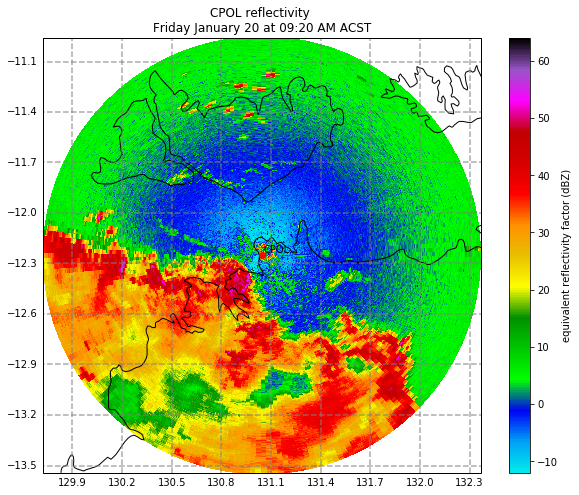

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:30:21.813542. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [5]:
lats = radar.gate_latitude
lons = radar.gate_longitude

min_lon = lons['data'].min()
min_lat = lats['data'].min()
max_lat = lats['data'].max()
max_lon = lons['data'].max()

print('min_lat:', min_lat, ' min_lon:', min_lon, 
      ' max_lat:', max_lat, ' max_lon:', max_lon)
fig = plt.figure(figsize = [10,8])
display = pyart.graph.RadarMapDisplayCartopy(radar)

lat_0 = display.loc[0]
lon_0 = display.loc[1]

sweep = 1
index_at_start = radar.sweep_start_ray_index['data'][sweep]
time_at_start_of_radar = netCDF4.num2date(radar.time['data'][index_at_start], 
                                  radar.time['units'])
pacific = pytz.timezone('Australia/Darwin')
local_time = pacific.fromutc(time_at_start_of_radar)
fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
print(fancy_date_string)

# Main difference! Cartopy forces you to select a projection first!
projection = cartopy.crs.Mercator(
                central_longitude=lon_0,
                min_latitude=min_lat, max_latitude=max_lat)

title = 'CPOL reflectivity \n' + fancy_date_string

display.plot_ppi_map(
    'reflectivity', sweep, colorbar_flag=True,
    title=title,
    projection=projection,
    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
    vmin=-12, vmax=64, resolution='10m')

# Mark the radar
display.plot_point(lon_0, lat_0, label_text='CPOL')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False


min_lat: -12.6  min_lon: 130.5  max_lat: -11.7  max_lon: 131.4
Friday January 20 at 09:20 AM ACST


/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/cartopy/mpl/feature_artist.py:134: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


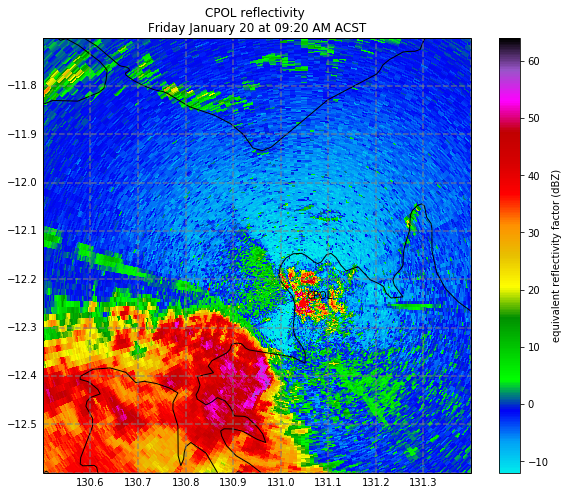

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:30:25.055911. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [6]:
lats = radar.gate_latitude
lons = radar.gate_longitude

min_lon = 130.5#lons['data'].min()
min_lat = -12.6#lats['data'].min()
max_lat = -11.7#lats['data'].max()
max_lon = 131.4#lons['data'].max()

print('min_lat:', min_lat, ' min_lon:', min_lon, 
      ' max_lat:', max_lat, ' max_lon:', max_lon)
fig = plt.figure(figsize = [10,8])
display = pyart.graph.RadarMapDisplayCartopy(radar)

lat_0 = display.loc[0]
lon_0 = display.loc[1]

sweep = 1
index_at_start = radar.sweep_start_ray_index['data'][sweep]
time_at_start_of_radar = netCDF4.num2date(radar.time['data'][index_at_start], 
                                  radar.time['units'])
pacific = pytz.timezone('Australia/Darwin')
local_time = pacific.fromutc(time_at_start_of_radar)
fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
print(fancy_date_string)

# Main difference! Cartopy forces you to select a projection first!
projection = cartopy.crs.Mercator(
                central_longitude=lon_0,
                min_latitude=min_lat, max_latitude=max_lat)

title = 'CPOL reflectivity \n' + fancy_date_string

display.plot_ppi_map(
    'reflectivity', sweep, colorbar_flag=True,
    title=title,
    projection=projection,
    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
    vmin=-12, vmax=64, resolution='10m')

# Mark the radar
display.plot_point(lon_0, lat_0, label_text='CPOL')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False


In [7]:
radar_start_date = netCDF4.num2date(radar.time['data'][0], radar.time['units'])
print(radar_start_date)
ymd_string = datetime.datetime.strftime(radar_start_date, '%Y%m%d')
hms_string = datetime.datetime.strftime(radar_start_date, '%H%M%S')
print(ymd_string, hms_string)



2006-01-19 23:50:09
20060119 235009


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:30:34.260687. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [8]:
z_dict, temp_dict, snr = radar_codes.snr_and_sounding_interp_sonde(radar, s_dir)
texture =  radar_codes.get_texture(radar)

*interpolatedsondeC1.c1.20060119.* twpinterpolatedsondeC1.c1.20060119.000030.nc
58.52417802810669


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:30:34.273589. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [9]:
radar.add_field('sounding_temperature', temp_dict, replace_existing = True)
radar.add_field('height', z_dict, replace_existing = True)
radar.add_field('SNR', snr, replace_existing = True)
radar.add_field('velocity_texture', texture, replace_existing = True)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:31:34.500125. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [10]:
blanker = deepcopy(radar.fields['cross_correlation_ratio'])
blanker['data'] = np.ones(blanker['data'].shape)
radar.add_field('normalized_coherent_power', blanker, replace_existing=True)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:31:34.509914. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


4.48173444152


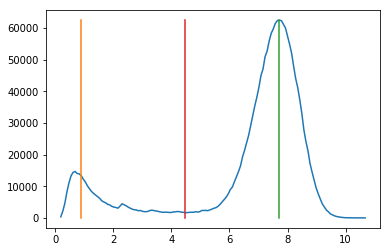

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:31:34.542647. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [11]:
n, bins = np.histogram(radar.fields['velocity_texture']['data'], bins = 150)
peaks = scipy.signal.find_peaks_cwt(n, np.array([10]))
centers = bins[0:-1] + (bins[1] - bins[0])
search_data = n[peaks[0]:peaks[1]]
search_centers = centers[peaks[0]:peaks[1]]
locs = search_data.argsort()
location_of_minima = locs[0]
plt.plot(centers, n)
zmax = n.max()
plt.plot([centers[peaks[0]], centers[peaks[0]]], [0, zmax])
plt.plot([centers[peaks[1]], centers[peaks[1]]], [0, zmax])
plt.plot([search_centers[location_of_minima], search_centers[location_of_minima]], [0, zmax])
noise_threshold = search_centers[locs[0]]
print(noise_threshold)


In [12]:
my_fuzz, cats = radar_codes.do_my_fuzz(radar)


doing
Doing rain
Doing melting
Doing multi_trip
Doing no_scatter
Doing snow
Doing hard constraining  melting
(array([   0,    0,    0, ..., 4115, 4115, 4115]), array([ 0,  1,  2, ..., 13, 14, 15]))
Doing hard constraining  multi_trip
(array([ 970,  971,  972, ..., 4115, 4115, 4115]), array([479, 479, 479, ..., 477, 478, 479]))
Doing hard constraining  melting
(array([ 486,  486,  486, ..., 4115, 4115, 4115]), array([452, 453, 454, ..., 477, 478, 479]))
Doing hard constraining  rain
(array([ 728,  728,  728, ..., 4115, 4115, 4115]), array([390, 391, 392, ...,  53,  54,  55]))
Doing hard constraining  melting
(array([   0,    0,    0, ..., 4115, 4115, 4115]), array([  0,   1,   2, ..., 477, 478, 479]))
4


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:31:34.825679. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [13]:
radar.add_field('gate_id', my_fuzz, 
                      replace_existing = True)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:31:38.484307. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [14]:
print(radar.fields['gate_id']['notes'])
cat_dict = {}
for pair_str in radar.fields['gate_id']['notes'].split(','):
    print(pair_str)
    cat_dict.update({pair_str.split(':')[1]:int(pair_str.split(':')[0])})

sorted_cats = sorted(cat_dict.items(), key=operator.itemgetter(1))


0:rain,1:melting,2:multi_trip,3:no_scatter,4:snow
0:rain
1:melting
2:multi_trip
3:no_scatter
4:snow


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:31:38.494514. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [40]:
print(sorted_cats)

[('rain', 0), ('melting', 1), ('multi_trip', 2), ('no_scatter', 3), ('snow', 4)]


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 12:12:57.143937. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3435: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3444: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


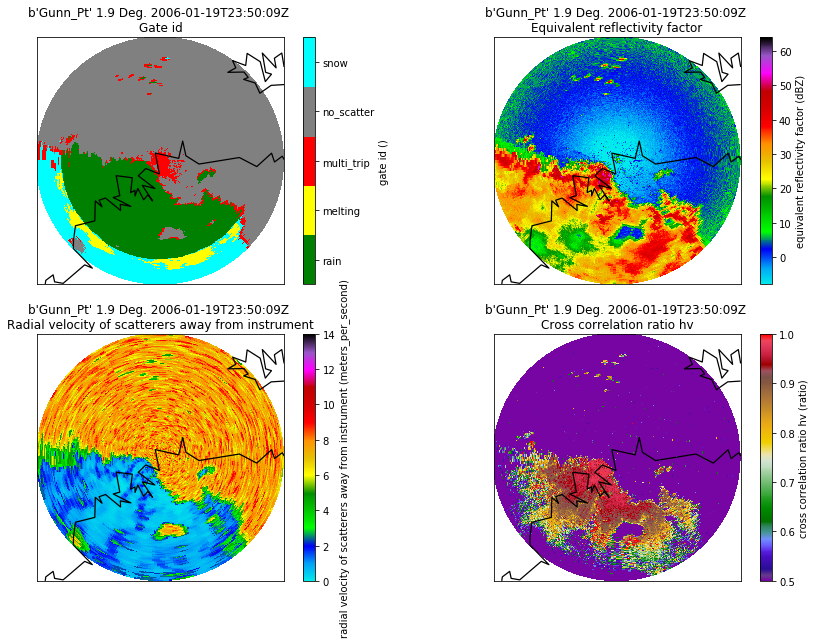

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 12:17:31.595458. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [43]:
cat_colors = {'rain' : 'green', 'multi_trip' : 'red', 'no_scatter' : 'gray', 'snow' : 'cyan', 'melting' : 'yellow'}
min_lon = lons['data'].min()
min_lat = lats['data'].min()
max_lat = lats['data'].max()
max_lon = lons['data'].max()

lal = np.arange(min_lat, max_lat, .5)
lat_lines = np.arange(min_lon, max_lon, .5)

sw = 2

display = pyart.graph.RadarMapDisplay(radar)

f = plt.figure(figsize = [15,10])
plt.subplot(2, 2, 1) 
lab_colors=['red','cyan', 'gray', 'green', 'yellow']
lab_colors = [cat_colors[kitty[0]] for kitty in sorted_cats]
    
cmap = matplotlib.colors.ListedColormap(lab_colors)
display.plot_ppi_map('gate_id', sweep = sw, 
                     min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'l', cmap = cmap, vmin = 0, vmax = 5)
cbax=plt.gca()
#labels = [item.get_text() for item in cbax.get_xticklabels()]
#my_display.cbs[-1].ax.set_yticklabels(cats)
tick_locs   = np.linspace(0,len(cats) -1 ,len(cats))+0.5
display.cbs[-1].locator     = matplotlib.ticker.FixedLocator(tick_locs)
catty_list = [sorted_cats[i][0] for i in range(len(sorted_cats))]
display.cbs[-1].formatter   = matplotlib.ticker.FixedFormatter(catty_list)
display.cbs[-1].update_ticks()
plt.subplot(2, 2, 2) 
display.plot_ppi_map('reflectivity', sweep = sw, vmin = -8, vmax = 64,
                      min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'l', cmap = pyart.graph.cm.NWSRef)

plt.subplot(2, 2, 3) 
display.plot_ppi_map('velocity_texture', sweep = sw, vmin =0, vmax = 14, 
                     min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'l', cmap = pyart.graph.cm.NWSRef)
plt.subplot(2, 2, 4) 
display.plot_ppi_map('cross_correlation_ratio', sweep = sw, vmin = .5, vmax = 1,
                      min_lon = min_lon, max_lon = max_lon, min_lat = min_lat, max_lat = max_lat,
                     resolution = 'l', cmap = pyart.graph.cm.Carbone42)
plt.savefig('../images/cmac2_0p5.png')

In [16]:
happy_gates = pyart.correct.GateFilter(radar)
happy_gates.exclude_all()
happy_gates.include_equal('gate_id', cat_dict['rain'])
happy_gates.include_equal('gate_id', cat_dict['melting'])
happy_gates.include_equal('gate_id', cat_dict['snow'])


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:31:43.183556. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


min_lat: -12.6  min_lon: 130.5  max_lat: -11.7  max_lon: 131.4
Friday January 20 at 09:20 AM ACST


/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/cartopy/mpl/feature_artist.py:134: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


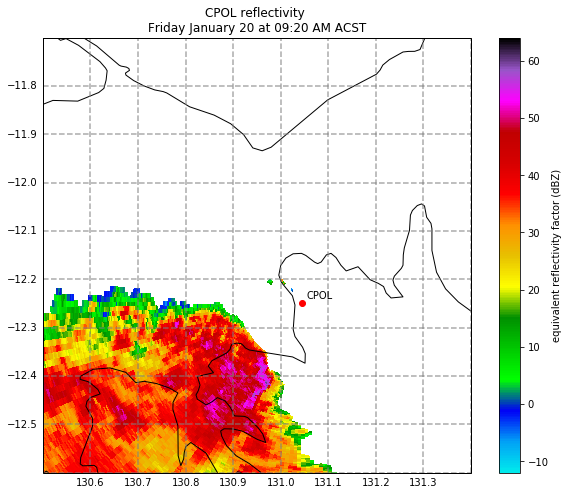

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:31:43.209601. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [17]:
lats = radar.gate_latitude
lons = radar.gate_longitude

min_lon = 130.5#lons['data'].min()
min_lat = -12.6#lats['data'].min()
max_lat = -11.7#lats['data'].max()
max_lon = 131.4#lons['data'].max()

print('min_lat:', min_lat, ' min_lon:', min_lon, 
      ' max_lat:', max_lat, ' max_lon:', max_lon)
fig = plt.figure(figsize = [10,8])
display = pyart.graph.RadarMapDisplayCartopy(radar)

lat_0 = display.loc[0]
lon_0 = display.loc[1]

sweep = 1
index_at_start = radar.sweep_start_ray_index['data'][sweep]
time_at_start_of_radar = netCDF4.num2date(radar.time['data'][index_at_start], 
                                  radar.time['units'])
pacific = pytz.timezone('Australia/Darwin')
local_time = pacific.fromutc(time_at_start_of_radar)
fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
print(fancy_date_string)

# Main difference! Cartopy forces you to select a projection first!
projection = cartopy.crs.Mercator(
                central_longitude=lon_0,
                min_latitude=min_lat, max_latitude=max_lat)

title = 'CPOL reflectivity \n' + fancy_date_string

display.plot_ppi_map(
    'reflectivity', sweep, colorbar_flag=True,
    title=title,
    projection=projection,
    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
    vmin=-12, vmax=64, resolution='10m', gatefilter=happy_gates)

# Mark the radar
display.plot_point(lon_0, lat_0, label_text='CPOL')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False


In [18]:
melt_locations = np.where(radar.fields['gate_id']['data'] == 1)
kinda_cold = np.where(radar.fields['sounding_temperature']['data'] < 0)
fzl_sounding = radar.gate_altitude['data'][kinda_cold].min()
if len(melt_locations[0] > 1):
    fzl_pid = radar.gate_altitude['data'][melt_locations].min()
    fzl = (fzl_pid + fzl_sounding)/2.0
else:
    fzl = fzl_sounding

print(fzl)
if fzl > 5000:
    fzl = 3500.0


4947.8784564


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:31:44.595152. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [19]:
phidp, kdp = pyart.correct.phase_proc_lp(radar, 0.0, debug=True, fzl=fzl)

Unfolding


/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/pyart/correct/phase_proc.py:188: RuntimeWarning: invalid value encountered in sqrt
  noise = smooth_and_trim(np.sqrt((line - signal) ** 2), window_len=wl)
/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/pyart/correct/phase_proc.py:189: RuntimeWarning: divide by zero encountered in true_divide
  return abs(signal) / noise


Exec time:  8.132350206375122
Doing  0


/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/pyart/correct/phase_proc.py:589: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  sct[np.where(sct < 0.0)] = 0.0


Doing  1
Doing  2
Doing  3
Doing  4
Doing  5
Doing  6
Doing  7
Doing  8
Doing  9
Doing  10
Doing  11
Doing  12
Doing  13
Doing  14
Doing  15
Doing  16


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:31:44.685031. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [20]:
radar.add_field('corrected_differential_phase', phidp,replace_existing = True)
radar.add_field('corrected_specific_diff_phase', kdp,replace_existing = True)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:32:10.031965. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [21]:
csu_kdp_field, csu_filt_dp, csu_kdp_sd = radar_codes.return_csu_kdp(radar)

0.7783689498901367 seconds to run


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:32:10.042763. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [22]:
radar.add_field('bringi_differential_phase', csu_filt_dp, replace_existing = True)
radar.add_field('bringi_specific_diff_phase', csu_kdp_field, replace_existing = True)
radar.add_field('bringi_specific_diff_phase_sd', csu_kdp_sd, replace_existing = True)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:32:10.953780. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [23]:
m_kdp, phidp_f, phidp_r = pyart.retrieve.kdp_proc.kdp_maesaka(radar, 
                                                              gatefilter=happy_gates)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:32:10.964217. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [24]:
radar.add_field('maesaka_differential_phase', m_kdp, replace_existing = True)
radar.add_field('maesaka_forward_specific_diff_phase', phidp_f, replace_existing = True)
radar.add_field('maesaka__reverse_specific_diff_phase', phidp_r, replace_existing = True)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:32:51.400946. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3435: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3444: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


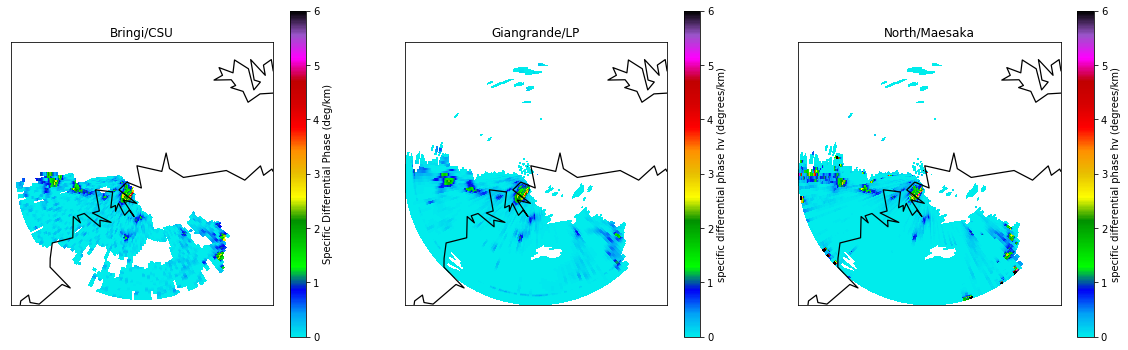

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:25.480558. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [26]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [20,6])
plt.subplot(1,3,1)
display.plot_ppi_map('bringi_specific_diff_phase', sweep = 0, resolution = 'l',
                    mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef,
                    vmin = 0, vmax = 6, title='Bringi/CSU',
                    gatefilter=happy_gates)
plt.subplot(1,3,2)
display.plot_ppi_map('corrected_specific_diff_phase', sweep = 0, resolution = 'l',
                    mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef,
                    vmin = 0, vmax = 6, title='Giangrande/LP',
                    gatefilter=happy_gates)

plt.subplot(1,3,3)
display.plot_ppi_map('maesaka_differential_phase', sweep = 0, resolution = 'l',
                    mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef,
                    vmin = 0, vmax = 6, title='North/Maesaka',
                    gatefilter=happy_gates)

plt.savefig('../images/kdpcomp.png')



In [27]:
height = radar.gate_altitude
lats = radar.gate_latitude
lons = radar.gate_longitude
lowest_lats = lats['data'][radar.sweep_start_ray_index['data'][0]:radar.sweep_end_ray_index['data'][0],:]
lowest_lons = lons['data'][radar.sweep_start_ray_index['data'][0]:radar.sweep_end_ray_index['data'][0],:]
c1_dis_lat = -12.4389
c1_dis_lon = 130.9556
cost = np.sqrt((lowest_lons - c1_dis_lon)**2 + (lowest_lats - c1_dis_lat)**2)
index = np.where(cost == cost.min())
lon_locn = lowest_lons[index]
lat_locn = lowest_lats[index]
print(lat_locn, lon_locn)


[-12.43768033] [ 130.95511975]


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:28.910748. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [28]:
dis_output_location = os.path.join(odir_s,ymd_string)
if not os.path.exists(dis_output_location):
    os.makedirs(dis_output_location)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:28.928061. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [29]:
dis_string = ''
time_of_dis = netCDF4.num2date(radar.time['data'], radar.time['units'])[index[0]][0]
tstring = datetime.datetime.strftime(time_of_dis, '%Y%m%d%H%H%S')
dis_string = dis_string + tstring + ' '
for key in radar.fields.keys():
    dis_string = dis_string + key + ' '
    dis_string = dis_string + str(radar.fields[key]['data'][index][0]) + ' '

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:28.940263. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [30]:
write_dis_filename = os.path.join(dis_output_location,
                                 'csapr_distro_'+ymd_string+hms_string+'.txt')

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:29.005371. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [31]:
dis_fh = open(write_dis_filename, 'w')
dis_fh.write(dis_string)
dis_fh.close()


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:29.020625. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [32]:
hts = np.linspace(radar.altitude['data'],15000.0 + radar.altitude['data'],61)
flds =['reflectivity', 
     'bringi_specific_diff_phase',
     'corrected_specific_diff_phase',
     'maesaka_differential_phase',
     'cross_correlation_ratio',
     'velocity_texture']
my_qvp = radar_codes.retrieve_qvp(radar, hts, flds = flds)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:29.053687. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [33]:
hts_string = 'height(m) '
for htss in hts:
    hts_string = hts_string + str(int(htss)) + ' '

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:29.073609. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [34]:
write_qvp_filename = os.path.join(dis_output_location,
                                 'csapr_qvp_'+ymd_string+hms_string+'.txt')

dis_fh = open(write_qvp_filename, 'w')
dis_fh.write(hts_string + '\n')
for key in flds:
    print(key)
    this_str = key + ' '
    for i in range(len(hts)):
        this_str = this_str + str(my_qvp[key][i]) + ' '
    this_str = this_str + '\n'
    dis_fh.write(this_str)
dis_fh.close()

reflectivity
bringi_specific_diff_phase
corrected_specific_diff_phase
maesaka_differential_phase
cross_correlation_ratio
velocity_texture


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:29.090377. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


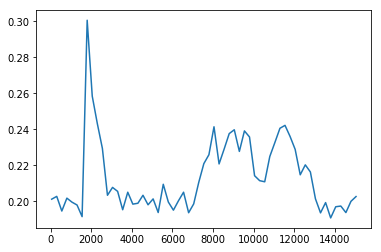

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:29.119338. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [35]:
plt.plot(my_qvp['height'], my_qvp['cross_correlation_ratio'])

In [36]:
im_output_location = os.path.join(odir_i,ymd_string)
if not os.path.exists(im_output_location):
    os.makedirs(im_output_location)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:29.357624. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3435: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3444: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


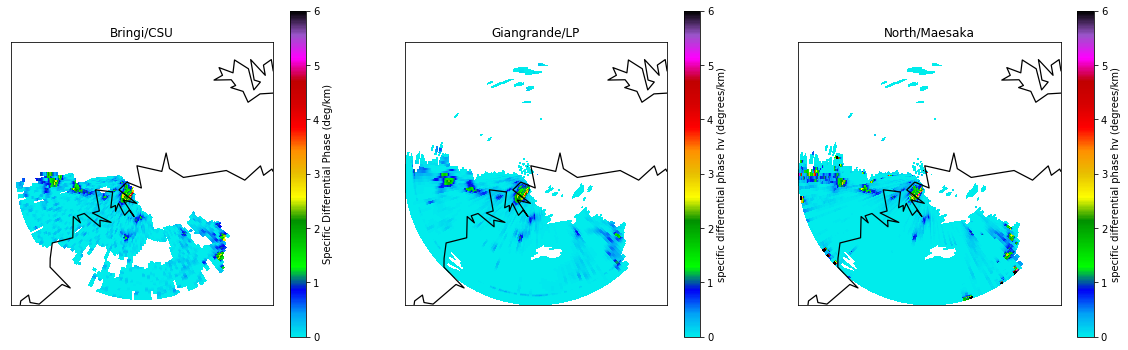

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:38:29.367759. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [37]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [20,6])
plt.subplot(1,3,1)
display.plot_ppi_map('bringi_specific_diff_phase', sweep = 0, resolution = 'l',
                    mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef,
                    vmin = 0, vmax = 6, title='Bringi/CSU',
                    gatefilter=happy_gates)
plt.subplot(1,3,2)
display.plot_ppi_map('corrected_specific_diff_phase', sweep = 0, resolution = 'l',
                    mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef,
                    vmin = 0, vmax = 6, title='Giangrande/LP',
                    gatefilter=happy_gates)

plt.subplot(1,3,3)
display.plot_ppi_map('maesaka_differential_phase', sweep = 0, resolution = 'l',
                    mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef,
                    vmin = 0, vmax = 6, title='North/Maesaka',
                    gatefilter=happy_gates)

plt.savefig(os.path.join(im_output_location, 'csapr_kdp_comp_'+ymd_string+hms_string+'.png'))

In [39]:
r_output_location = os.path.join(odir_r,ymd_string)
if not os.path.exists(r_output_location):
    os.makedirs(r_output_location)
rfilename = os.path.join(r_output_location, 'csaprsur_' + ymd_string + '.' +  hms_string + '.nc')
pyart.io.write_cfradial(rfilename, radar)



/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-19 11:45:59.259350. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)
